# 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 그래프 스타일
plt.style.use("ggplot")

# 운영체제에 맞는 폰트 불러오기
font_family = get_font_family()

# 폰트 설정
plt.rc("font", family= font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 업종/테마 수집

## 제약업종

In [4]:
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
url

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35'

In [6]:
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [10]:
# 원하는 정보
raw = table[2]
print(raw.shape)

raw = raw.dropna(how="all").dropna(how="all", axis=1) # 행과 열에 NAN 값 삭제
raw.shape

(146, 12)


(143, 9)

# 파생변수

In [15]:
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2021-05-07'

In [16]:
# 일자별로 데이터가 다르니 조회일자 추가
raw["조회일자"] = today

In [17]:
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,삼성제약,7070.0,1630.0,+29.96%,7070.0,0.0,20435374.0,135170.0,570986.0,2021-05-07
2,신풍제약우,72500.0,4100.0,+5.99%,72400.0,72500.0,48886.0,3443.0,54038.0,2021-05-07
3,셀트리온,266500.0,14000.0,+5.54%,266000.0,266500.0,1286288.0,340116.0,1153094.0,2021-05-07
4,대웅제약,143500.0,7500.0,+5.51%,143000.0,143500.0,335356.0,49097.0,60566.0,2021-05-07
5,한미사이언스,70100.0,3300.0,+4.94%,70000.0,70100.0,264873.0,18453.0,167034.0,2021-05-07
...,...,...,...,...,...,...,...,...,...,...
139,박셀바이오 *,91800.0,3700.0,-3.87%,91700.0,91800.0,446117.0,41895.0,1807745.0,2021-05-07
140,한국유니온제약 *,15400.0,700.0,-4.35%,15400.0,15450.0,307189.0,4813.0,1017298.0,2021-05-07
141,코스맥스엔비티 *,9900.0,450.0,-4.35%,9900.0,9930.0,514152.0,5147.0,213279.0,2021-05-07
142,이수앱지스 *,16950.0,900.0,-5.04%,16900.0,16950.0,2447891.0,42747.0,1366704.0,2021-05-07


# 거래량과 거래대금 시각화

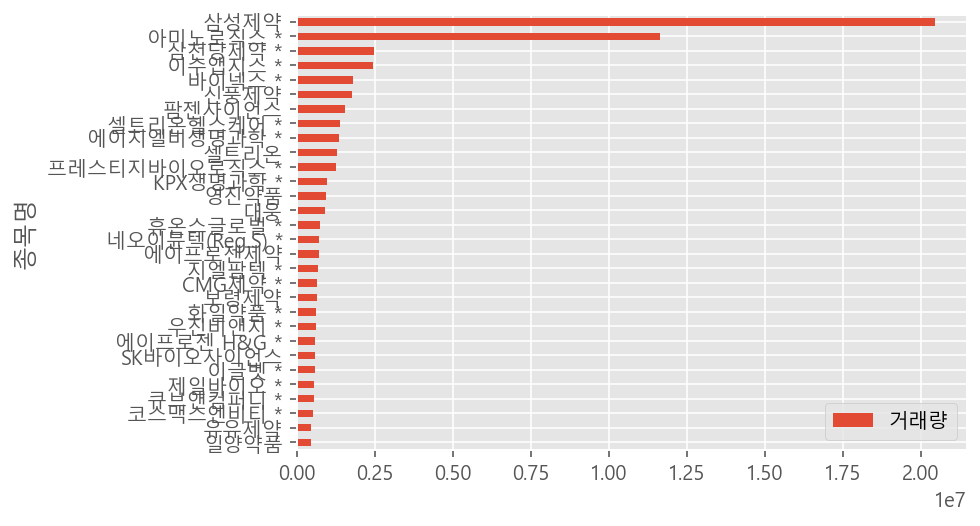

In [25]:
temp = raw[["종목명","거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

# 종목명과 거래대금 시각화

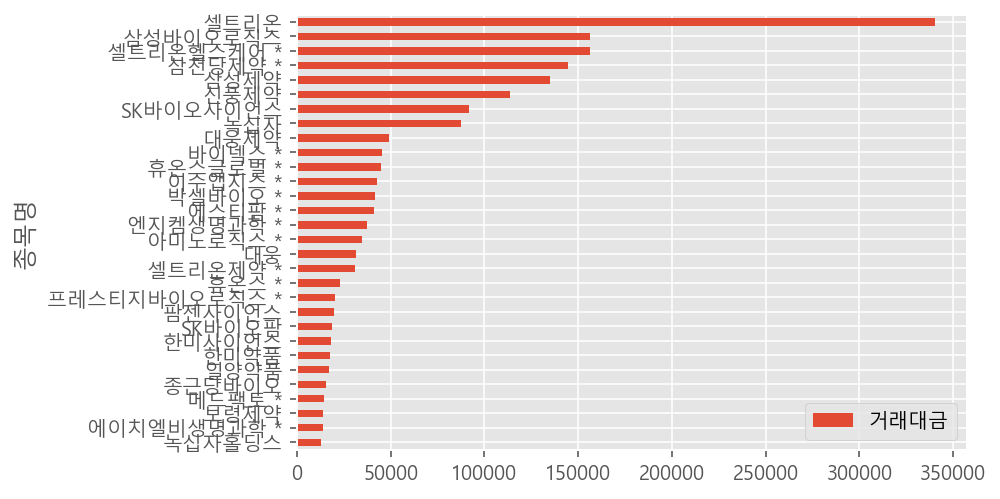

In [29]:
temp = raw[["종목명","거래대금"]].set_index("종목명")
temp.sort_values("거래대금").tail(30).plot.barh()

# merge - 종목코드 병합

In [31]:
# 기존 종목명에 *표시가 존재하는 것은 *를 제거해서 새로운 컬럼에 담아줌
raw["종목명_전처리"] = raw["종목명"].str.replace("*","")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip() # 띄어스기 제거

In [32]:
raw[["종목명","종목명_전처리"]].head()

,종목명,종목명_전처리
1,삼성제약,삼성제약
2,신풍제약우,신풍제약우
3,셀트리온,셀트리온
4,대웅제약,대웅제약
5,한미사이언스,한미사이언스


In [34]:
# 전체 거래소 목록 불러오기
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [37]:
df_item_code_name = df_krx[["Symbol","Name"]]
df_item_code_name.columns = ["종목코드","종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [38]:
raw.shape

(143, 11)

In [40]:
df = raw.merge(df_item_code_name, on="종목명_전처리")
df.shape

(143, 12)

In [41]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,삼성제약,7070.0,1630.0,+29.96%,7070.0,0.0,20435374.0,135170.0,570986.0,2021-05-07,삼성제약,001360
1,신풍제약우,72500.0,4100.0,+5.99%,72400.0,72500.0,48886.0,3443.0,54038.0,2021-05-07,신풍제약우,019175
2,셀트리온,266500.0,14000.0,+5.54%,266000.0,266500.0,1286288.0,340116.0,1153094.0,2021-05-07,셀트리온,068270
3,대웅제약,143500.0,7500.0,+5.51%,143000.0,143500.0,335356.0,49097.0,60566.0,2021-05-07,대웅제약,069620
4,한미사이언스,70100.0,3300.0,+4.94%,70000.0,70100.0,264873.0,18453.0,167034.0,2021-05-07,한미사이언스,008930
...,...,...,...,...,...,...,...,...,...,...,...,...
138,박셀바이오 *,91800.0,3700.0,-3.87%,91700.0,91800.0,446117.0,41895.0,1807745.0,2021-05-07,박셀바이오,323990
139,한국유니온제약 *,15400.0,700.0,-4.35%,15400.0,15450.0,307189.0,4813.0,1017298.0,2021-05-07,한국유니온제약,080720
140,코스맥스엔비티 *,9900.0,450.0,-4.35%,9900.0,9930.0,514152.0,5147.0,213279.0,2021-05-07,코스맥스엔비티,222040
141,이수앱지스 *,16950.0,900.0,-5.04%,16900.0,16950.0,2447891.0,42747.0,1366704.0,2021-05-07,이수앱지스,086890


# 종목 상세정보 수집

In [42]:
item_code = "068270"
item_name = "셀트리온"

In [43]:
item_url=f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [51]:
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [61]:
# 테이블의 원소값 확인하여 원하는 데이터의 위치 확인
tables[3]

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2018.12   2019.12   2020.12 2021.12(E)   2019.12   2020.03   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액   9821.00  11285.00  18491.00   24614.00   3827.00   3728.00   
1        영업이익   3387.00   3781.00   7121.00   10109.00   1142.00   1202.00   
2       당기순이익   2536.00   2980.00   5192.00    7921.00    951.00   1053.00   
3       영업이익률     34.49     33.50     38.51      41.07     29.84     32.25   
4        순이익률     25.82     26.41     28.08      32.18     24.84     28.24   
5   ROE(지배주주)     10.84     11.19     16.68      21.32     11.19     12.47   
6        부채비율     34.48     33.94     46.09        NaN     33.94     37.26   
7        당좌비율    221.23    224.94    193.38        NaN    224.94    228.68   
8         유보율   1975.54   2181.03   2467.14        NaN   2181.03   2151.40   
9      EPS(원)   1914.00   2168.00   3717.00    5798.00    692.00    764.00   
10     PER(배)    109.03     81.98     96.59      43.55     81.98     91.22   
11     BPS(원)  18546.00  20510.00  24441.00   30447.00  20510.00  21241.00   
12     PBR(배)     11.25      8.67     14.69       8.29      8.67     10.59   
13   주당배당금(원)       NaN       NaN       NaN      13.00       NaN       NaN   
14   시가배당률(%)       NaN       NaN       NaN        NaN       NaN       NaN   
15    배당성향(%)      0.95      2.14      0.52        NaN       NaN       NaN   

                                             
     2020.06   2020.09   2020.12 2021.03(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    4288.00   5488.00   4987.00    5189.00  
1    1818.00   2453.00   1647.00    1957.00  
2    1386.00   1758.00    995.00    1359.00  
3      42.41     44.70     33.04      37.72  
4      32.32     32.04     19.96      26.20  
5      14.05     17.14     16.68        NaN  
6      37.41     38.27     46.09        NaN  
7     220.10    225.72    193.38        NaN  
8    2265.20   2394.35   2467.14        NaN  
9    1004.00   1240.00    709.00    1110.00  
10    103.37     68.34     96.59     227.39  
11  22378.00  23717.00  24441.00        NaN  
12     13.43     10.66     14.69        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

In [57]:
# 제대로 수집된 것인지 확인하고 가장 최근 데이터만 따로 불러오기
tables[3].iloc[:,[0,-1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2021.03(E)
,주요재무정보,IFRS연결
0,매출액,5189.00
1,영업이익,1957.00
2,당기순이익,1359.00
3,영업이익률,37.72
4,순이익률,26.20
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [56]:
# 필요한 정보 합치기
pd.concat([tables[6],tables[7],tables[8],tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.12),추정PERlEPS,PBRlBPS (2020.12),배당수익률,동일업종 PER,동일업종 등락률
1,137703428,28553771,20.74%,"4.00매수 l 370,833","396,239 l 199,837","71.70배 l 3,717원","46.00배 l 5,798원","10.90배 l 24,441원",NaN,115.97배,+2.75%


# 컬럼명과 값 형태로 된 테이블만 사용

In [59]:
# 수집한 정보를 list 형태로 관리
item_info=[]

In [64]:
# 가장 최근의 재무정보를 변수에 담기
finance_info = tables[3].iloc[:,[0,-1]]
finance_info.columns = [0,1]
finance_info

,0,1
0,매출액,5189.00
1,영업이익,1957.00
2,당기순이익,1359.00
3,영업이익률,37.72
4,순이익률,26.20
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1110.00


In [68]:
# table 반복문을 돌며 컬럼의 수가 2인 테이블만 따로 추출해 item_info에 리스트 형태로 추가
for t in tables:
    if t.shape[1] ==2:
        item_info.append(t)

In [73]:
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5189
1,영업이익,1957
2,당기순이익,1359
3,영업이익률,37.72
4,순이익률,26.2
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1110


# transpose를 통해 행과 열의 위치를 변경

In [77]:
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.12),추정PERlEPS,PBRlBPS (2020.12),배당수익률,동일업종 PER,동일업종 등락률
1,5189,1957,1359,37.72,26.2,NaN,NaN,NaN,NaN,1110,...,28553771,20.74%,"4.00매수 l 370,833","396,239 l 199,837","71.70배 l 3,717원","46.00배 l 5,798원","10.90배 l 24,441원",NaN,115.97배,+2.75%


# 개별 주가 정보 수집 함수 생성

In [84]:
import time

def get_item_info(item_code):
    item_url=f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info=[]
    finance_info = tables[3].iloc[:,[0,-1]]
    finance_info.columns = [0,1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] ==2:
            item_info.append(t)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    
    time.sleep(0.1)
    
    return df_item

In [83]:
item_code = "091990"
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.12),추정PERlEPS,PBRlBPS (2020.12),배당수익률,동일업종 PER,동일업종 등락률
1,3748,708,222,18.89,5.92,NaN,NaN,NaN,NaN,372,...,25927815,16.73%,"4.00매수 l 154,500","177,100 l 79,827","72.56배 l 1,556원","50.00배 l 2,269원","8.95배 l 12,620원",NaN,115.97배,+2.75%


# tqdm

In [85]:
from tqdm.auto import tqdm
tqdm.pandas()

E:\anaconda\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [86]:
result = df["종목코드"].progress_apply(get_item_info) # progress_apply로 진행상태 확인

In [91]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0   매출액  영업이익 당기순이익  영업이익률  순이익률 ROE(지배주주) 부채비...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
138    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
139    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
140    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
141    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
142    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 143, dtype: object

# concat을 통한 데이터프레임 합치기

In [100]:
df_item_info = pd.concat(result.tolist()) # concat으로 합칠때는 리스트 형태여야함
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [101]:
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 등락률,배당수익률l2020.12,PERlEPS(2020.06),PBRlBPS (2020.06),PERlEPS(2021.02),PBRlBPS (2021.02),배당수익률l2020.11,PERlEPS(2021.03),PBRlBPS (2021.03),종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,001360
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,0.16%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,019175
2,5189,1957,1359,37.72,26.2,NaN,NaN,NaN,NaN,1110,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,068270
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,0.42%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,069620
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,0.28%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,008930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323990
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,080720
140,702,17,7,2.42,1,NaN,NaN,NaN,NaN,46,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222040
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,086890


In [106]:
df_info = df.merge(df_item_info)

In [107]:
df.shape, df_item_info.shape, df_info.shape

((143, 12), (143, 40), (143, 51))

# 파일명 만들기

In [109]:
url.split("=")

['https://finance.naver.com/sise/sise_group_detail.nhn?type',
 'upjong&no',
 '35']

In [113]:
file_name_1 = url.split("=")[1].replace("&","_")
file_name_2 = url.split("=")[2]

file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'upjong_no_35_2021-05-07.csv'

In [114]:
# csv 파일로 저장
df_info.to_csv(file_name, index=False)

In [116]:
# 불러오기
pd.read_csv(file_name).head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,동일업종 PER,동일업종 등락률,배당수익률l2020.12,PERlEPS(2020.06),PBRlBPS (2020.06),PERlEPS(2021.02),PBRlBPS (2021.02),배당수익률l2020.11,PERlEPS(2021.03),PBRlBPS (2021.03)
0,삼성제약,7070.0,1630.0,+29.96%,7070.0,0.0,20435374.0,135170.0,570986.0,2021-05-07,...,115.97배,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,신풍제약우,72500.0,4100.0,+5.99%,72400.0,72500.0,48886.0,3443.0,54038.0,2021-05-07,...,115.97배,+2.75%,0.16%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,셀트리온,266500.0,14000.0,+5.54%,266000.0,266500.0,1286288.0,340116.0,1153094.0,2021-05-07,...,115.97배,+2.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,대웅제약,143500.0,7500.0,+5.51%,143000.0,143500.0,335356.0,49097.0,60566.0,2021-05-07,...,115.97배,+2.75%,0.42%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,한미사이언스,70100.0,3300.0,+4.94%,70000.0,70100.0,264873.0,18453.0,167034.0,2021-05-07,...,115.97배,+2.75%,0.28%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
